# PyTorch autograd package

## Why do we need it ?

### Minimize cost function Gradient descent

<img src="./images/ball.png" style="width: 400px; float: right"/>
Minimize the cost function $J(\text{w})$ 

By updating Equation and repeat unitil convergence :
        
$\text{w}_j := \text{w}_j - \alpha \frac{\partial J(\text{w})}{\partial \text{w}_j}$ (simultaneously update $\text{w}_j$ for all $j$)

### Gradient retropropagation

<img src="./images/nn2.png" style="width: 400px;"/>

- Possible to manually compute with one or two-layer network
- Quickly very hard or impossible for large complex network

### autograd and computational graph 

- Use automatic differentiation to automate the computation of backward passes in neural networks
- autograd package in PyTorch provides exactly this functionality.
- forward pass define a computational graph :
    - nodes = Tensors
    - edges = Functions that produce output Tensors from input Tensors.
    
<img src="./images/forward.png" style="width: 700px;"/>
    
- backward pass : 
    - Backpropagating through the computational graph to easily compute local gradients of loss in respect with tensors.
    
<img src="./images/backward.png" style="width: 700px;"/>

## How autograd works ?

In [43]:
import torch

In [44]:
x = torch.rand(4,4)
x

tensor([[0.6217, 0.4180, 0.3382, 0.2092],
        [0.4404, 0.6537, 0.1442, 0.0076],
        [0.2026, 0.8671, 0.2594, 0.7305],
        [0.6454, 0.6676, 0.6270, 0.8143]])

In [45]:
y = torch.rand(4,4)
y

tensor([[0.5274, 0.9445, 0.8255, 0.9871],
        [0.0474, 0.2647, 0.3412, 0.4494],
        [0.4670, 0.1543, 0.4708, 0.0894],
        [0.8342, 0.3278, 0.2069, 0.6811]])

In [46]:
z = x + y
z

tensor([[1.1491, 1.3625, 1.1636, 1.1963],
        [0.4878, 0.9184, 0.4854, 0.4570],
        [0.6696, 1.0214, 0.7302, 0.8199],
        [1.4795, 0.9955, 0.8339, 1.4954]])

In [47]:
l = z.mean()
l

tensor(0.9541)

In [48]:
l.backward() # Use autograd to compute the backward pass

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [50]:
x = torch.rand(4,4, requires_grad=True)
y = torch.rand(4,4)

In [51]:
z = x + y
z

tensor([[0.4466, 1.3247, 1.2018, 1.2874],
        [1.1195, 0.8000, 1.1396, 0.8573],
        [1.0035, 0.9584, 1.3845, 1.3986],
        [1.3910, 1.3064, 0.6828, 1.6529]], grad_fn=<AddBackward0>)

In [52]:
z.requires_grad

True

In [53]:
l = z.mean()
l

tensor(1.1222, grad_fn=<MeanBackward1>)

In [54]:
l.backward() # Use auµrad to compute the backward pass

In [55]:
x.grad

tensor([[0.0625, 0.0625, 0.0625, 0.0625],
        [0.0625, 0.0625, 0.0625, 0.0625],
        [0.0625, 0.0625, 0.0625, 0.0625],
        [0.0625, 0.0625, 0.0625, 0.0625]])

## Simple linear regression with autograd

prediction : $\hat{y} = \mathbf{w}x$

loss : $J(\mathbf{w}) = \frac{1}{2} \sum_i (\hat{y}^{(i)} - y^{(i)})^2$

### Generate some data

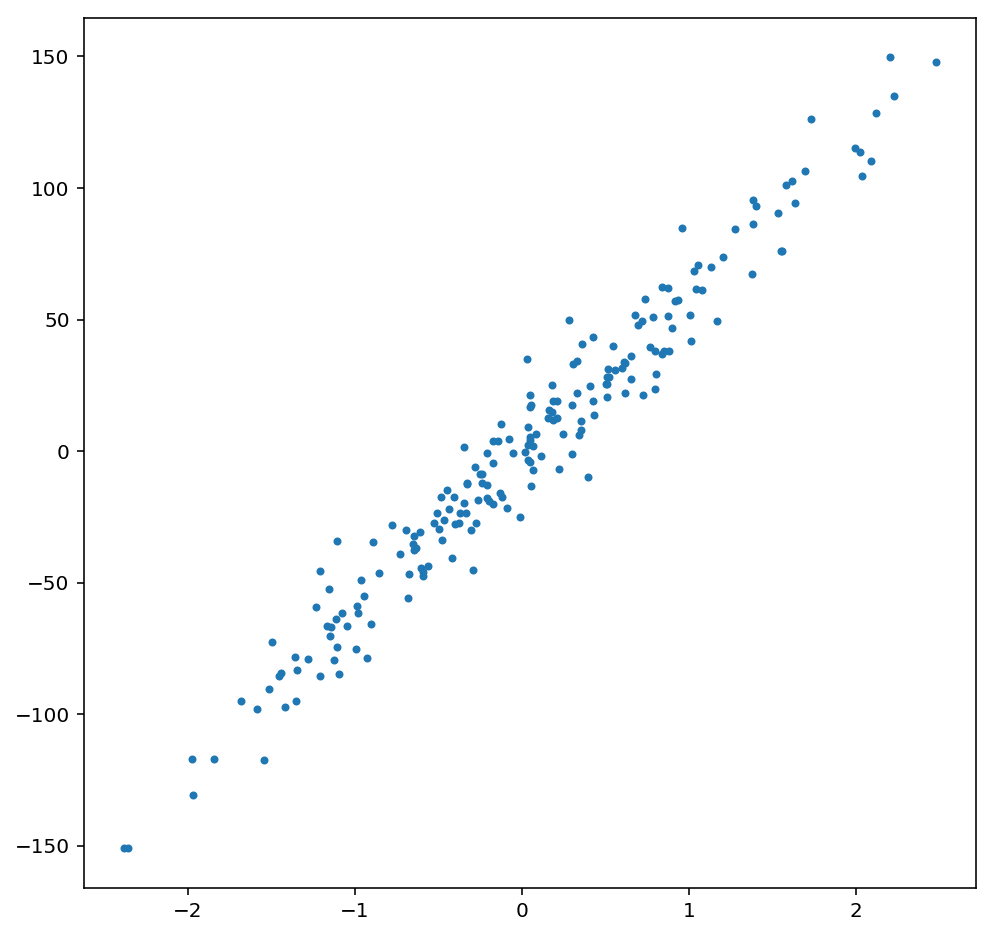

In [56]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format ='retina'
plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots

def visualisation(x, y, y_):
    fig, ax = plt.subplots()
    ax.plot(x.cpu().numpy(), y.cpu().numpy(), ".", label="data")
    ax.plot(x.cpu().numpy(), y_.cpu().numpy(), ".", label="pred")
    ax.set_title(f"MSE: {loss.item():0.1f}")
    ax.legend();

from sklearn.datasets import make_regression

np.random.seed(4)
n_features = 1
n_samples = 200

x_np, y_np = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    noise=12,
)

fix, ax = plt.subplots()
ax.plot(x_np, y_np, ".")

### Initialize PyTorch Tensors

In [59]:
import torch

# data tensors
x = torch.from_numpy(x_np).float()
y = torch.from_numpy(y_np.reshape((n_samples, n_features))).float()

# Use GPU is possible
device = torch.device("cuda:0" if torch.cuda.is_available() 
                      else "cpu")

# model's parameters tensor
w = torch.zeros(x.shape[1], 1, 
                device=device, dtype=torch.float, 
                requires_grad=True)

### Learning

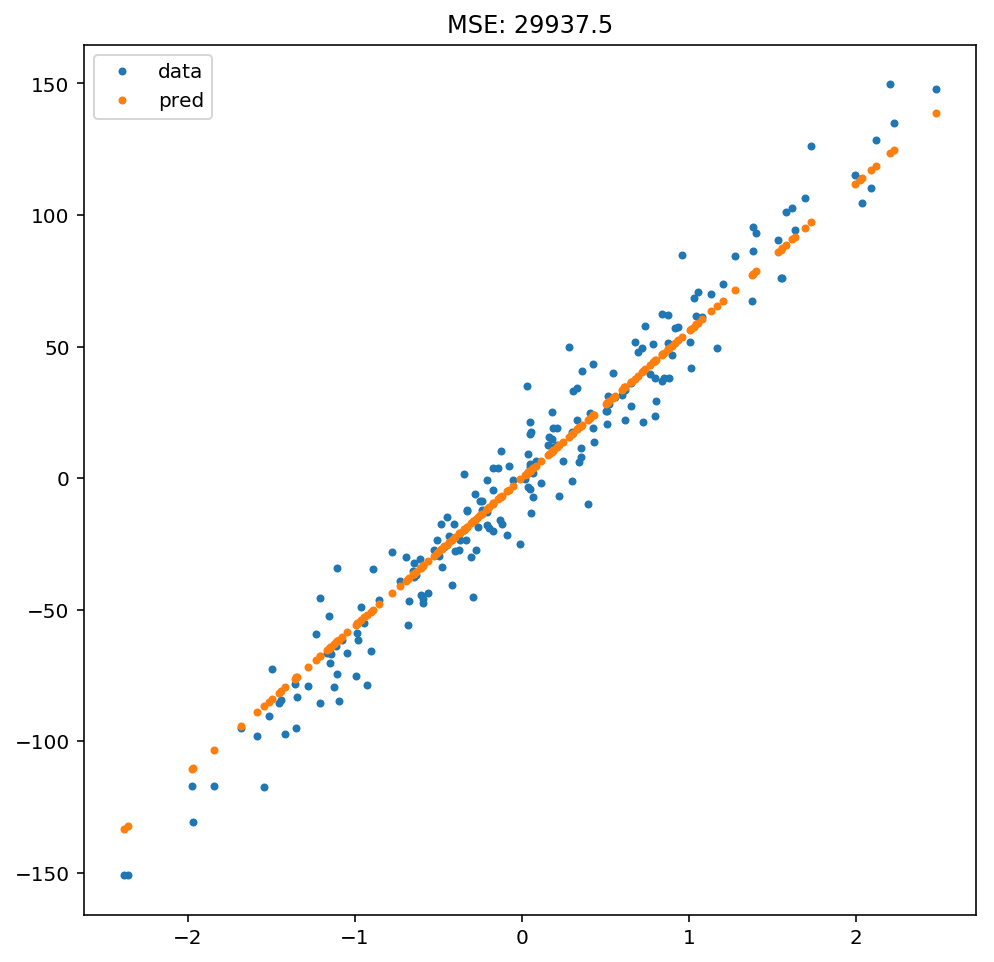

In [74]:
# define learning rate
learning_rate = 5e-4

y_pred = x.mm(w) # forward pass

loss = (y_pred - y).pow(2).sum() # calulate loss

loss.backward() # Use autograd to compute the backward pass

with torch.no_grad():
    w -= learning_rate * w.grad # Correct the model parameters
    w.grad.zero_()

visualisation(x[:,0], y, y_pred.detach())

### Training loop

0 676439.125
1 289902.0625
2 133640.859375
3 70470.875
4 44933.8359375
5 34610.234375
6 30436.833984375
7 28749.697265625
8 28067.654296875
9 27791.9375
10 27680.478515625
11 27635.4140625
12 27617.19921875
13 27609.833984375
14 27606.859375
15 27605.658203125
16 27605.16796875
17 27604.970703125
18 27604.89453125
19 27604.85546875


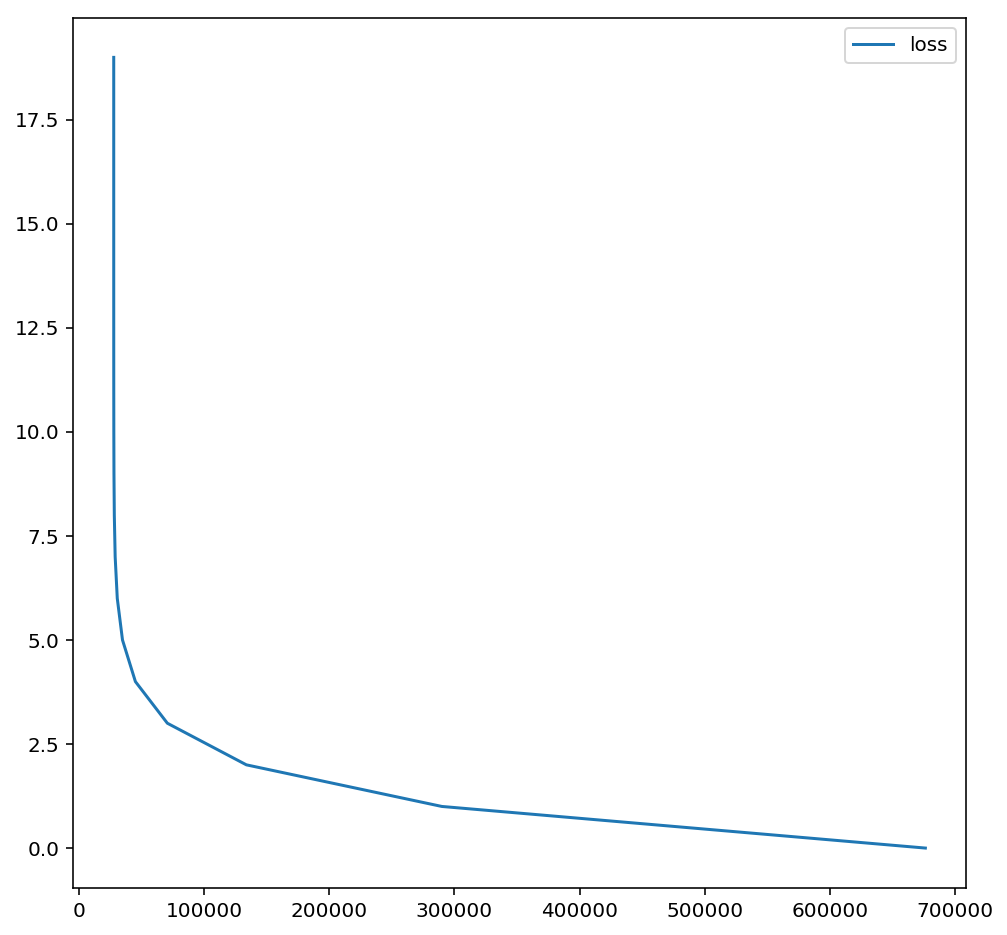

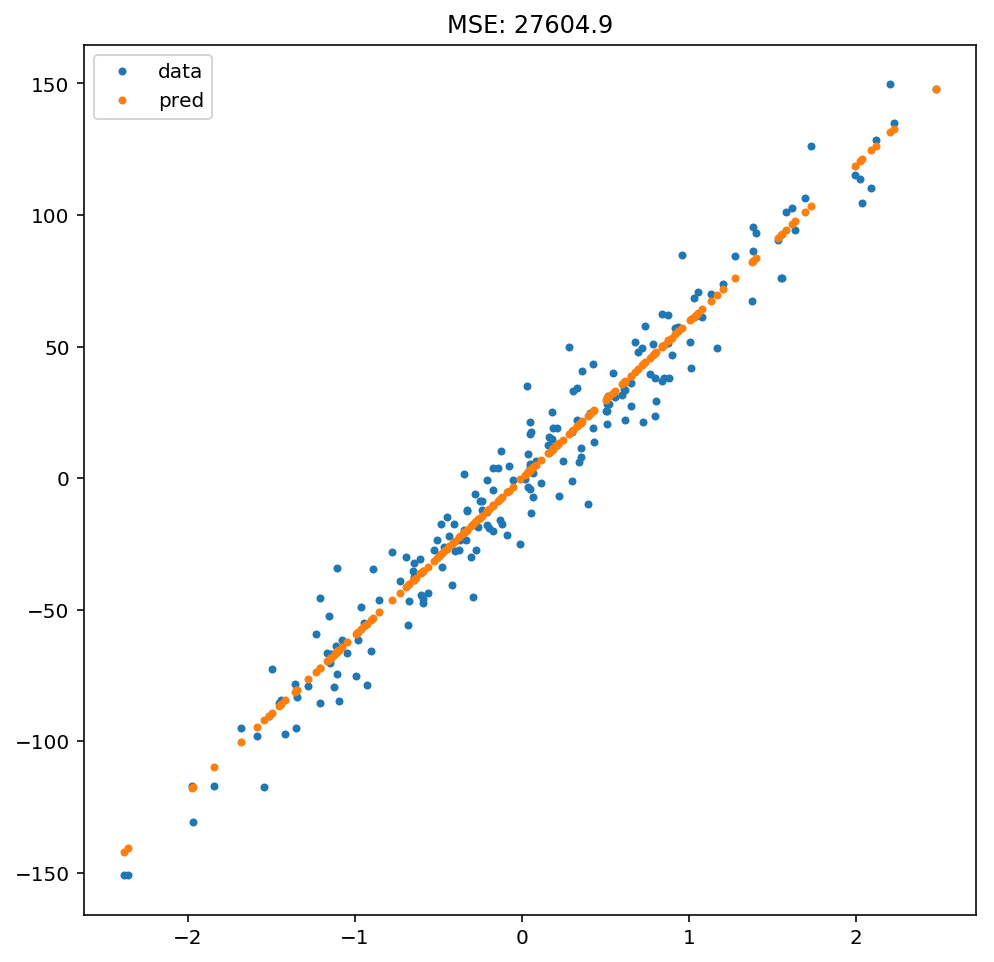

In [75]:
# reinitialise model parameters tensor
w = torch.zeros(x.shape[1], 1, 
                device=device, dtype=torch.float, 
                requires_grad=True)
time = []
cost = []
learning_rate = 1e-3
epochs = 20
for t in range(epochs):
    # Forward pass (compute the predicted y)
    y_pred = x.mm(w)

    # Compute and print loss using operations on Tensors
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())
    time.append(t)
    cost.append(loss)

    # Use autograd to compute the backward pass 
    loss.backward()

    # Manually update weights using gradient descent
    with torch.no_grad():
        # Correct the model parameters
        w -= learning_rate * w.grad
        
        # Manually zero the gradients after updating weights
        w.grad.zero_()

fig, ax = plt.subplots()
ax.plot(cost, time, label="loss")
ax.legend();

visualisation(x[:,0], y, y_pred.detach())

## Static vs dynamic computational graph

PyTorch autograd looks a lot like TensorFlow : 
- define a computational graph
- use automatic differentiation to compute gradients

Biggest difference :
- TensorFlow’s computational graphs are **static**
- PyTorch uses **dynamic** computational graphs

In **TensorFlow** :
- Define the computational graph once
- Execute the same graph over and over again possibly feeding different input data to the graph

In **PyTorch** : 
- Each forward pass defines a new computational graph

Static graphs are convenient for : 
- optimize graph
    - fuse some graph operation for efficiency
    - strategy for distributing the graph over many GPUs

Dynamic graphs are convenient for :
- flow control : perform computation that differs for each input
- access to model parameters
- debugging model

## Recap - what we learned so far
- autograd compute backward pass by backpropagating gradients through computational graph
- Apply .backward() function on tensor of scalar value
- Get the gradient of a tensor w with w.grad